In [2]:
library(nycflights13)
library(ggplot2)
library(tidyverse)

# 1.1)
# create a new column in "flights" with the date of departure
flights$date <- as.Date(with(flights, paste(day, month, year, sep="-")), "%d-%m-%Y")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.0
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# create a new data.frame with 3 columns: origin airport, date and number of flights
from_ny <- flights %>% count(origin, date)

head(from_ny)

origin,date,n
<chr>,<date>,<int>
EWR,2013-01-01,305
EWR,2013-01-02,350
EWR,2013-01-03,336
EWR,2013-01-04,339
EWR,2013-01-05,238
EWR,2013-01-06,301


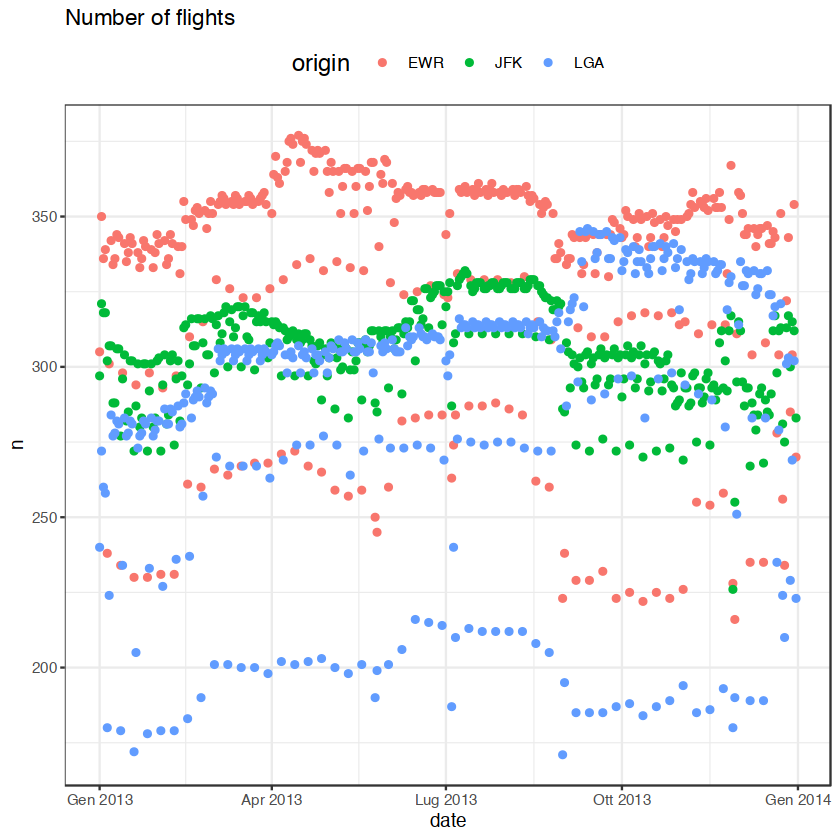

In [4]:
# plot of the total number of flights departed from each of the three NYC airports as a function of time 
ggp_from_ny <- ggplot(from_ny, aes(date, n, col = origin)) + geom_point() + theme_bw() + theme(legend.position = "top") + theme(legend.title = element_text(size=14, face = "bold")) + ggtitle("Number of flights") + labs(y = "n", x = "date")

ggp_from_ny

In [5]:
# 1.2)
# create a function that gives the number of the week from the date
count_week <- function(x){
    n <- rep(0, length(x))
    for (i in 1:length(x)) {
        if (x[i] == "2013-12-30" || x[i] == "2013-12-31"){
            n[i] <- 53
        }
        else {
            n[i] <- isoweek(x[i])
        }
    } 
    return(n)
}


# create 2 new columns in "flights" with the number of the day and the number of the week 
flights$weekday <- wday(flights$date, week_start = 1)
flights$week_num <- count_week(flights$date)

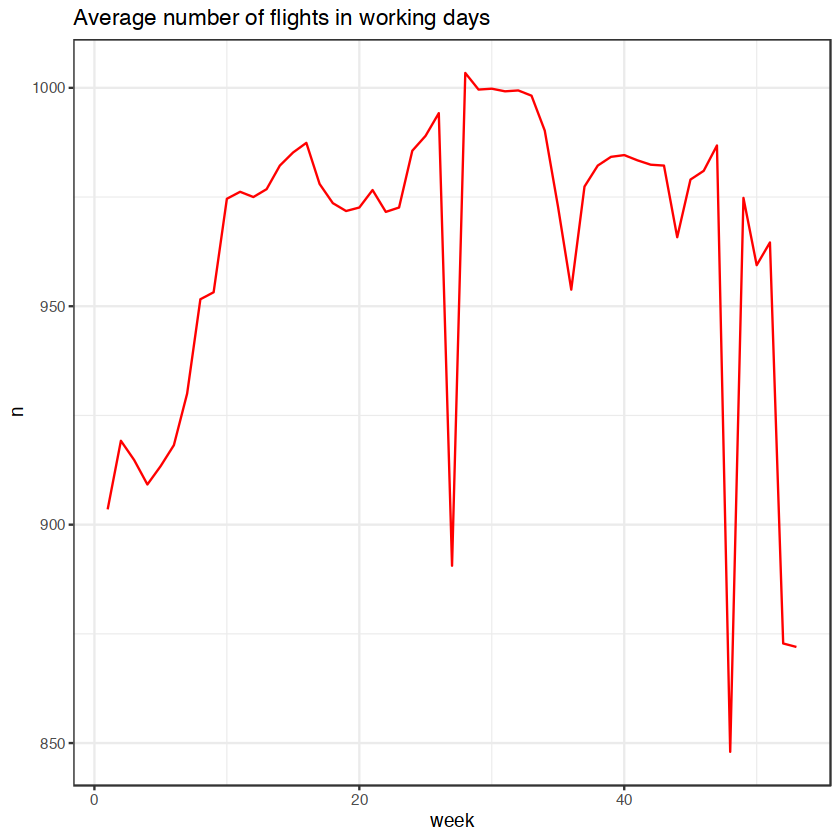

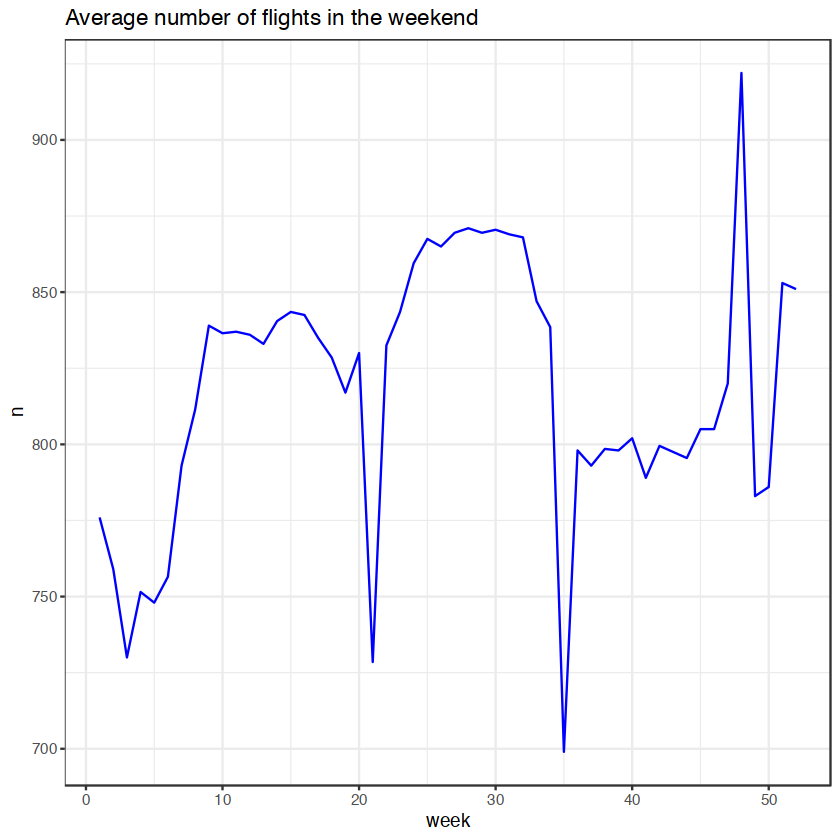

In [6]:
#divide the working days from the weekend
working_day <- filter(flights, weekday %in% c(1,2,3,4,5))
weekend_day <- filter(flights, weekday %in% c(6,7))

# calculate the mean number of flights for every week
working_day <- working_day %>% count(week_num, weekday) %>% group_by(week_num) %>% summarise(mean=mean(n), .groups = 'drop')
weekend_day <- weekend_day %>% count(week_num, weekday) %>% group_by(week_num) %>% summarise(mean=mean(n), .groups = 'drop')

# create plot
ggp_average_working <- ggplot(working_day, aes(week_num, mean)) + geom_line(color = "red") + theme_bw() + ggtitle("Average number of flights in working days") + labs(y = "n", x = "week")
ggp_average_weekend <- ggplot(weekend_day, aes(week_num, mean)) + geom_line(color = "blue") + theme_bw() + ggtitle("Average number of flights in the weekend") + labs(y = "n", x = "week")  
ggp_average_working
ggp_average_weekend

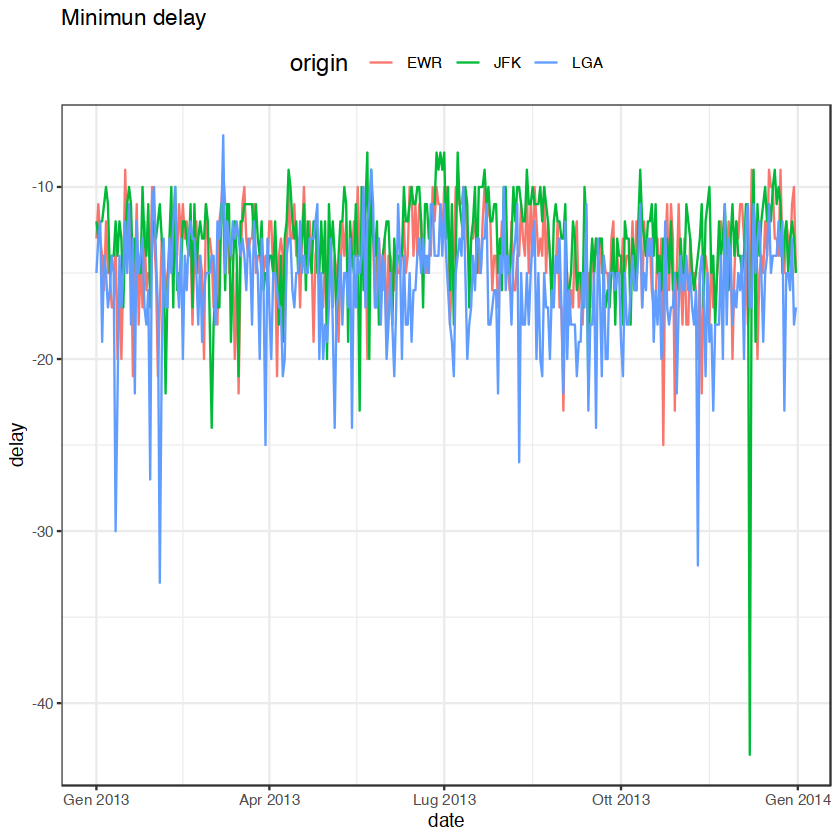

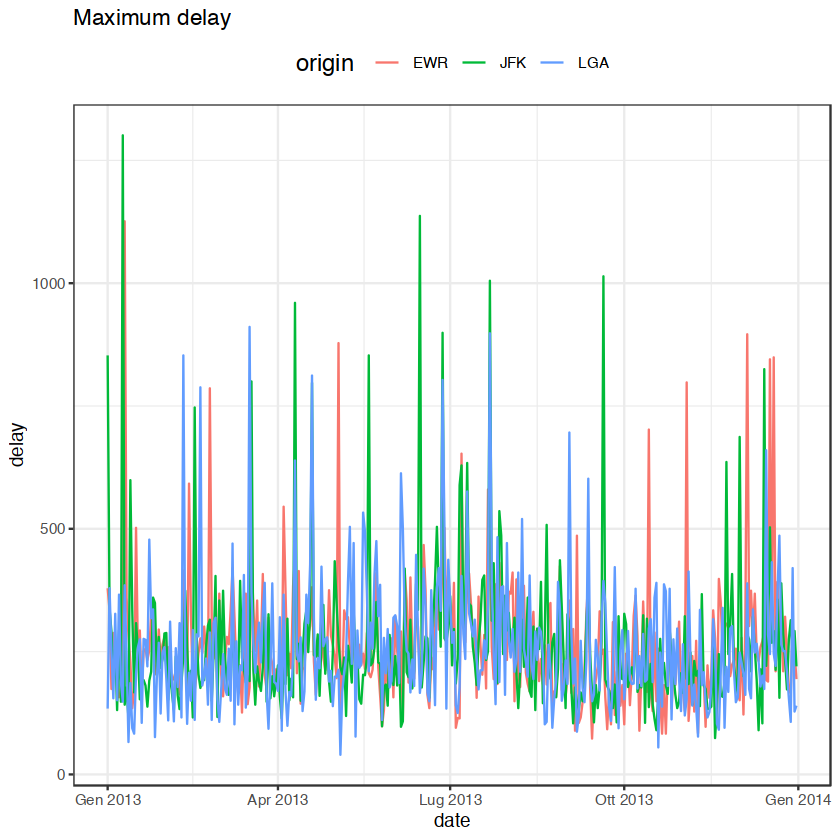

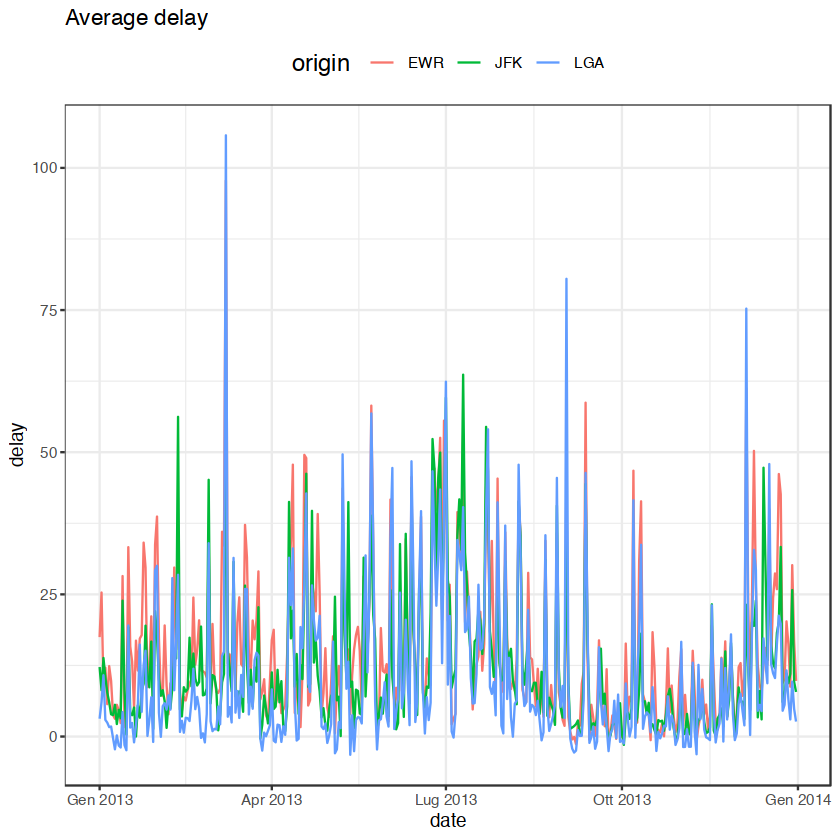

In [46]:
# 2.1)
# create 3 new tibbles with 3 columns: date, origin airport and min/max/average delay
min_delay <- flights %>% group_by(date, origin) %>% summarise(min = dep_delay[which.min(dep_delay)], .groups = 'drop')
max_delay <- flights %>% group_by(date, origin) %>% summarise(max = dep_delay[which.max(dep_delay)], .groups = 'drop')
average_delay <- flights %>% group_by(date, origin) %>% summarise(average = mean(dep_delay, na.rm = TRUE), .groups = 'drop')

# create plot
ggp_min_delay <- ggplot(min_delay, aes(date, min, col = origin)) + geom_line() + theme_bw() + theme(legend.position = "top") + theme(legend.title = element_text(size=14, face = "bold")) + ggtitle("Minimun delay") + labs(y = "delay", x = "date") 
ggp_max_delay <- ggplot(max_delay, aes(date, max, col = origin)) + geom_line() + theme_bw() + theme(legend.position="top") + theme(legend.title = element_text(size=14, face = "bold")) + ggtitle("Maximum delay") + labs(y = "delay", x = "date")
ggp_average_delay <- ggplot(average_delay, aes(date, average, col = origin)) + geom_line() + theme_bw() + theme(legend.position="top") + theme(legend.title = element_text(size = 14, face = "bold")) + ggtitle("Average delay") + labs(y = "delay", x = "date")

ggp_min_delay
ggp_max_delay
ggp_average_delay

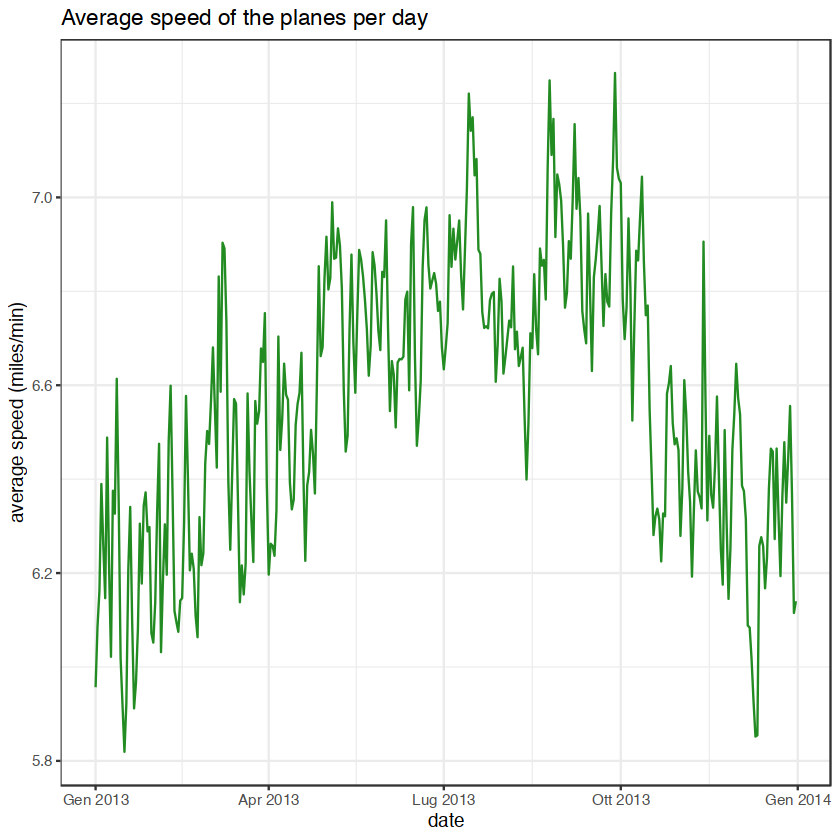

In [10]:
# 3)
# add a new column with the average speed (miles/min) of every flight and calculate the mean for every day
flights$speed <- flights$distance / flights$air_time 
speed <- flights %>% group_by(date) %>% summarise(average = mean(speed, na.rm = TRUE), .groups = 'drop')

# create plot
ggp_speed <- ggplot(speed, aes(date, average)) + geom_line(color = "forest green") + theme_bw() + ggtitle("Average speed of the planes per day") + labs(y = "average speed (miles/min)", x = "date")
ggp_speed

In [12]:
# 4.1)
# create two tibbles with date/number of the week, company and number of flights of every company per day/week
company_day <- subset(flights, select = c(carrier, date)) %>% count(carrier, date)
company_day <- company_day[with(company_day, order(date, n)),]

company_week <- subset(flights, select = c(carrier, week_num)) %>% count(carrier, week_num) 
company_week <- company_week[with(company_week, order(week_num, n)),]

head(company_day)
head(company_week)

carrier,date,n
<chr>,<date>,<int>
HA,2013-01-01,1
AS,2013-01-01,2
F9,2013-01-01,2
FL,2013-01-01,10
VX,2013-01-01,12
WN,2013-01-01,27


carrier,week_num,n
<chr>,<dbl>,<int>
YV,1,5
HA,1,6
AS,1,12
F9,1,12
FL,1,62
VX,1,72


In [13]:
# create 2 new tibbles with 4 columns: date/number of the week, largest two numbers of flights and corresponding airports
first_two_per_day <- company_day %>% group_by(date) %>% summarise(max_2 = n[length(n) - 1], company_2 = carrier[length(n) - 1], max = n[length(n) ], company= carrier[length(n)], .groups = 'drop')
first_two_per_week <- company_week %>% group_by(week_num) %>% summarise(max_2 = n[length(n) - 1], company_2 = carrier[length(n) - 1], max = n[length(n)], company= carrier[length(n)], .groups = 'drop')

head(first_two_per_day)
head(first_two_per_week)

date,max_2,company_2,max,company
<date>,<int>,<chr>,<int>,<chr>
2013-01-01,163,B6,165,UA
2013-01-02,162,B6,170,UA
2013-01-03,159,UA,162,B6
2013-01-04,161,B6,161,UA
2013-01-05,117,UA,154,B6
2013-01-06,137,UA,156,B6


week_num,max_2,company_2,max,company
<dbl>,<int>,<chr>,<int>,<chr>
1,909,UA,958,B6
2,994,B6,1035,UA
3,970,B6,1032,UA
4,960,B6,1032,UA
5,963,B6,1039,UA
6,972,B6,1041,UA


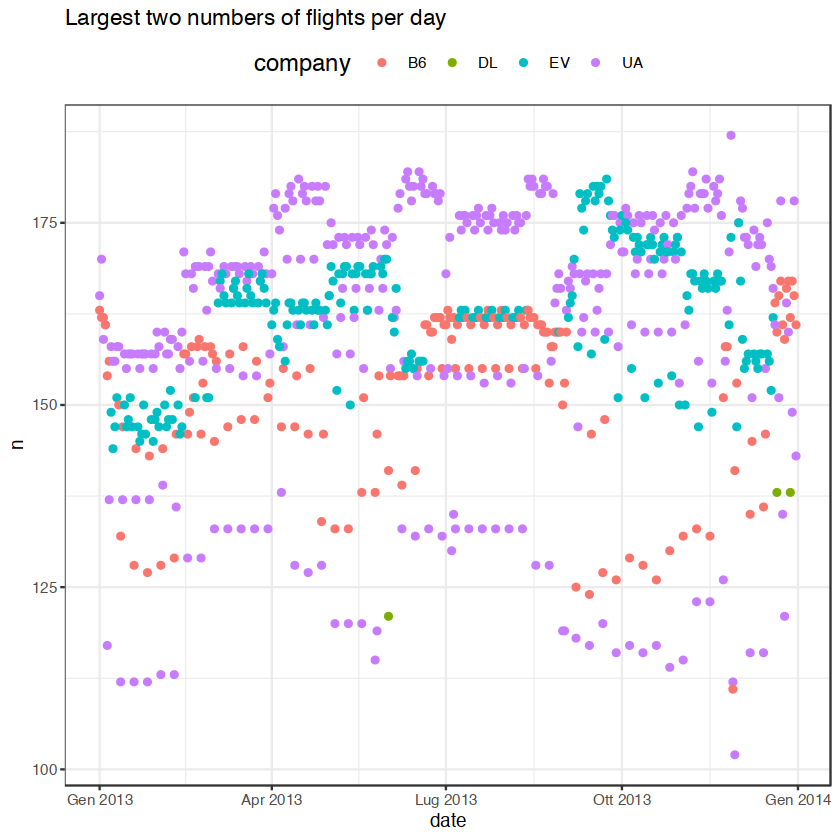

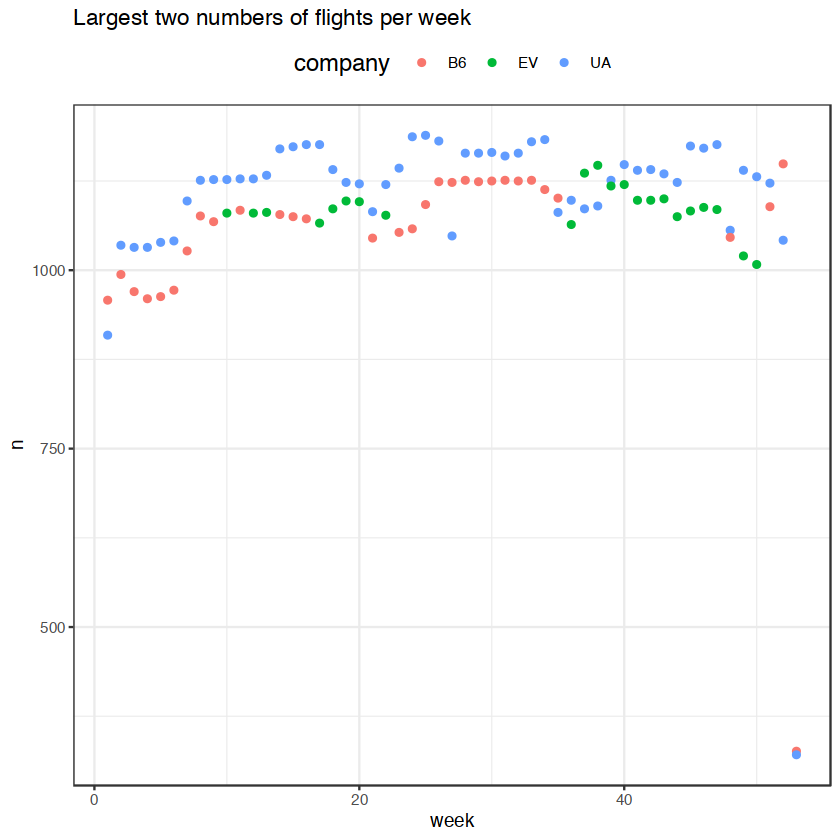

In [14]:
# new data frames to create a single plot 
first_two_per_day <- data.frame(date = first_two_per_day$date,                            
                      max_two = c(first_two_per_day$max, first_two_per_day$max_2),
                      company = c(first_two_per_day$company, first_two_per_day$company_2))
first_two_per_week <- data.frame(week = first_two_per_week$week_num,                            
                      max_two = c(first_two_per_week$max, first_two_per_week$max_2),
                      company = c(first_two_per_week$company, first_two_per_week$company_2))

# create plot
ggp_first_two_per_day <- ggplot(first_two_per_day, aes(date, max_two, col = company)) + geom_point() + theme_bw() + theme(legend.position="top") + theme(legend.title = element_text(size=14, face = "bold")) + ggtitle("Largest two numbers of flights per day") + labs(y = "n", x = "date")
ggp_first_two_per_week <- ggplot(first_two_per_week, aes(week, max_two, col = company)) + geom_point() + theme_bw() + theme(legend.position="top") + theme(legend.title = element_text(size=14, face = "bold")) + ggtitle("Largest two numbers of flights per week") + labs(y = "n", x = "week")
ggp_first_two_per_day
ggp_first_two_per_week

In [15]:
# 4.2)
# create a new data.frame with 3 columns: month, company and number of flights
company_month <- flights %>% count(month, carrier) 

head(company_month)

month,carrier,n
<int>,<chr>,<int>
1,9E,1573
1,AA,2794
1,AS,62
1,B6,4427
1,DL,3690
1,EV,4171


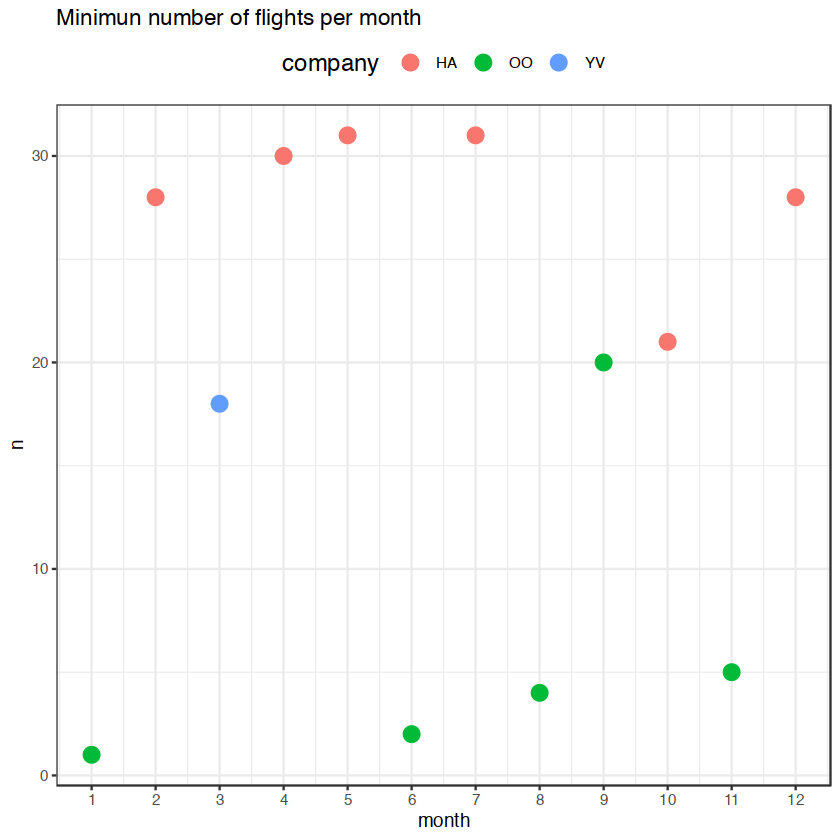

In [24]:
# create a new tibble with 3 columns: month, company and minimum number of flights
min_per_month <- company_month %>% group_by(month) %>% summarise(min = n[which.min(n)], company = carrier[which.min(n)], .groups = 'drop')

# create plot
ggp_min_per_month <- ggplot(min_per_month, aes(month, min, col = company)) + geom_point(size = 4) + theme_bw() + theme(legend.position="top") + theme(legend.title = element_text(size=14, face = "bold")) + ggtitle("Minimun number of flights per month") + labs(y = "n", x = "month") + scale_x_continuous(breaks = scales::pretty_breaks(n = 12))
ggp_min_per_month

In [48]:
# 4.3)
# create a new tibble with month, maximum distance and company
distance_month <- subset(flights, select = c(carrier, month, distance))
distance_month<- distance_month %>% group_by(month) %>% summarise(max_distance = distance[which.max(distance)], company = carrier[which.max(distance)], .groups = 'drop')

distance_month

month,max_distance,company
<int>,<dbl>,<chr>
1,4983,HA
2,4983,HA
3,4983,HA
4,4983,HA
5,4983,HA
6,4983,HA
7,4983,HA
8,4983,HA
9,4983,HA
